<a href="https://colab.research.google.com/github/Seanabuklau/Text_Mining/blob/main/is459_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [ ]:
import json

file_path = 'News_Category_Dataset_v3.json'
set_1 = set()
with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            data = json.loads(line)
            cat = data['category']
            if cat not in set_1:
              set_1.add(cat)

        except json.JSONDecodeError:
            pass

print('News Categories: ', set_1)

News Categories:  {'CRIME', 'WEDDINGS', 'EDUCATION', 'ARTS & CULTURE', 'SPORTS', 'QUEER VOICES', 'LATINO VOICES', 'IMPACT', 'TRAVEL', 'TASTE', 'POLITICS', 'FOOD & DRINK', 'FIFTY', 'U.S. NEWS', 'ARTS', 'CULTURE & ARTS', 'HOME & LIVING', 'BLACK VOICES', 'HEALTHY LIVING', 'PARENTS', 'SCIENCE', 'RELIGION', 'GREEN', 'WELLNESS', 'WORLDPOST', 'DIVORCE', 'MONEY', 'COLLEGE', 'PARENTING', 'TECH', 'STYLE & BEAUTY', 'MEDIA', 'ENTERTAINMENT', 'WEIRD NEWS', 'WOMEN', 'GOOD NEWS', 'STYLE', 'WORLD NEWS', 'COMEDY', 'THE WORLDPOST', 'BUSINESS', 'ENVIRONMENT'}


**Question 1 - Latent Dirichlet Allocation**

In [ ]:
!pip install pandas -q
!pip install gensim -q
!pip install spacy -q
!pip install nltk -q
!pip install wordcloud -q
!pip install matplotlib -q

In [ ]:
import pandas as pd
import gensim
import spacy
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

In [ ]:
# Preprocessing using spaCy
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

# Read the news data from a CSV file
df = pd.read_csv('q1-combined-file.csv')

# Fill NaN with empty string
df["News_Text"].fillna("", inplace=True)

# Ensure columns are in string
df["News_Text"] = df["News_Text"].astype(str)

# Preprocess the text data with spaCy
processed_news_data = []

for text in df["News_Text"]:
    # Tokenization & Lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha]

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    processed_news_data.append(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Topic Modelling using LDA
from gensim import corpora, models

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_news_data)
corpus = [dictionary.doc2bow(text) for text in processed_news_data]

# Perform LDA for topic modeling
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Extract top words for each topic
topics = lda_model.show_topics(num_topics=10, num_words=20)

# Create DF
topics_over_the_decade = pd.DataFrame(columns=['TopicID', 'Keywords'])

for topic_tup in topics:
  topic_id, keywords_string = topic_tup
  keywords = [value.split("*")[1].strip(' "').strip('"') for value in keywords_string.split(" + ")]
  new_data = {'TopicID': topic_id+1, 'Keywords': keywords}
  topics_over_the_decade = topics_over_the_decade.append(new_data, ignore_index=True)

<ipython-input-13-25e2438ac43d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_over_the_decade = topics_over_the_decade.append(new_data, ignore_index=True)
<ipython-input-13-25e2438ac43d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_over_the_decade = topics_over_the_decade.append(new_data, ignore_index=True)
<ipython-input-13-25e2438ac43d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_over_the_decade = topics_over_the_decade.append(new_data, ignore_index=True)
<ipython-input-13-25e2438ac43d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_over_the_decade = topics_over_the_decade.append(new_data,

In [ ]:
topics_over_the_decade

,TopicID,Keywords
0,1,"[like, eat, spring, video, egg, food, make, Eg..."
1,2,"[make, Coffee, pasta, lemon, Recipes, ingredie..."
2,3,"[whiskey, New, Gras, Shrimp, The, Mardi, movie..."
3,4,"[cheese, Cheese, make, sandwich, butter, Chick..."
4,5,"[french, food, Challenge, Onion, Snacks, Sauce..."
5,6,"[recipe, make, day, Day, photo, good, chocolat..."
6,7,"[food, bake, Food, Bacon, well, know, get, bac..."
7,8,"[Best, taste, good, test, food, wine, drink, b..."
8,9,"[Super, Bowl, cream, food, one, ice, HuffPost,..."
9,10,"[I, make, get, cook, recipe, love, use, way, t..."


**Visualisation**

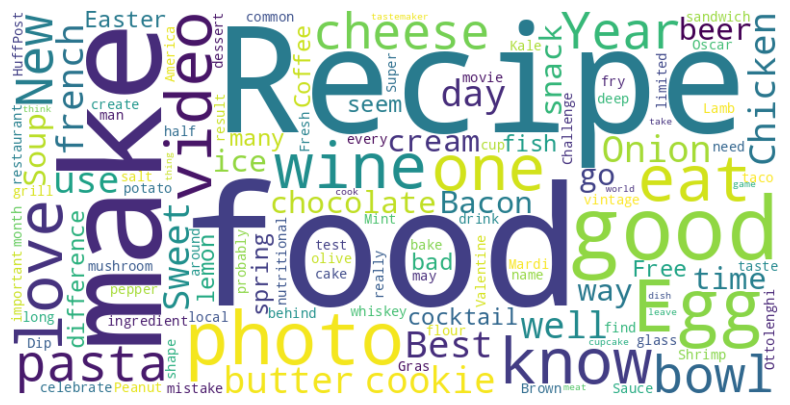

In [ ]:
unique_keywords = topics_over_the_decade['Keywords'].explode().astype(str)
text = ' '.join(unique_keywords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Question 2 - Sentiment Analysis**

In [ ]:
!pip install nltk -q
!pip install vaderSentiment -q
!pip install pandas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from pandas._config import describe_option
import nltk
import pandas as pd
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Parse news data
df = pd.read_csv('q2-combined-file.csv', parse_dates=['date'], dayfirst=True)

# Processing the csv file
df["News_Text"].fillna("", inplace=True)
df = df.astype({'date':'string', 'News_Text':'string'})
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Initialise analyser
analyzer = SentimentIntensityAnalyzer()

# Define sentiment analyser
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Function to get sentiment for each month in a specific year
def get_monthly_sentiment(year):
    monthly_sentiments = []

    for month in range(1, 13):
        # Filter the DataFrame for the specific year and month
        filtered_data = df[(df['date'].dt.year == year) & (df['date'].dt.month == month)]

        # Analyze sentiment for each news article in that month
        sentiments = [analyze_sentiment(row['News_Text']) for _, row in filtered_data.iterrows()]

        # Calculate the average sentiment for that month
        if sentiments:
            avg_sentiment = {
                'year': year,
                'month': month,
                'average_sentiment': sum(s['compound'] for s in sentiments) / len(sentiments)
            }
            monthly_sentiments.append(avg_sentiment)

    return monthly_sentiments

# Analyze sentiment for each year from 2012 to 2022
all_yearly_sentiments = []

for year in range(2012, 2023):
    yearly_sentiments = get_monthly_sentiment(year)
    all_yearly_sentiments.extend(yearly_sentiments)

# Create a DataFrame for the results
result_df = pd.DataFrame(all_yearly_sentiments)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
result_df

,year,month,average_sentiment
0,2012,1,-0.095192
1,2012,2,-0.011365
2,2012,3,-0.159319
3,2012,4,0.009086
4,2012,5,0.055857
...,...,...,...
101,2022,3,-0.105825
102,2022,4,-0.027867
103,2022,5,-0.335567
104,2022,7,-0.250000


**Visualisation**

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale))
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  plt.title('Average Financial Sentiment Over 10 Years (2012-2022)')
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *['average_sentiment'], **{})
chart

*Comparision with S&P500 over the past decade*

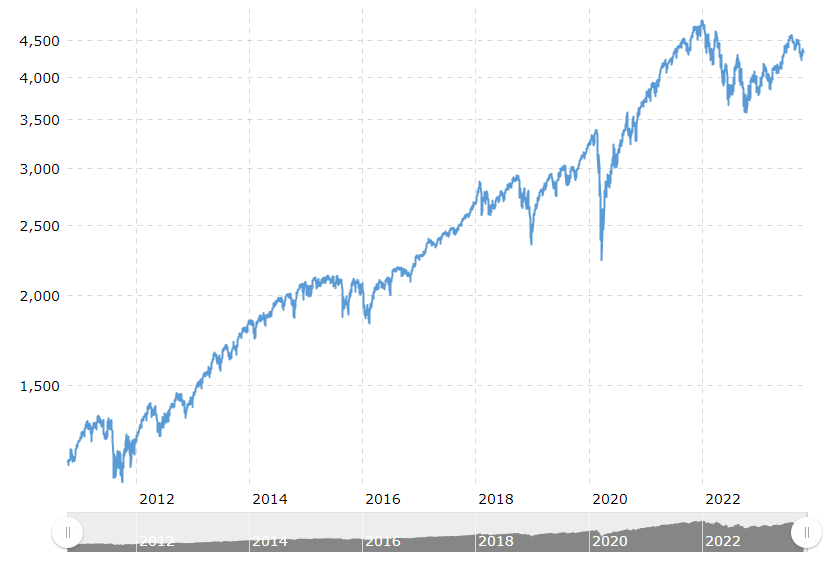

Taken from: https://www.macrotrends.net/2488/sp500-10-year-daily-chart

**Question 3 - Entity Recognition**

In [ ]:
!pip install spacy -q
!pip install pandas -q
!pip install plotly -q
!python -m spacy download en_core_web_sm -q

2023-10-14 13:59:55.062241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import pandas as pd
import spacy
import plotly.express as px

In [ ]:
import re

# Load the English NLP model from spaCy
nlp = spacy.load("en_core_web_sm")

# Load news data
try:
    df = pd.read_csv("q3-combined-file.csv", encoding="utf-8", on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error parsing CSV: {e}")

# Fill NaN with empty string
df["short_description"].fillna("", inplace=True)

# Ensure columns are in string
df = df.astype({'short_description':'string', 'headline':'string'})

# Function to clean the text data
def clean_text(text):
    # Remove non-standard characters using a regular expression
    cleaned_text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    return cleaned_text

# Apply the clean_text function
df["headline"] = df["headline"].apply(clean_text)
df["short_description"] = df["short_description"].apply(clean_text)

# Define keywords and entities to extract
keywords = ["Apple", "mobile", "tech", "technology", "smartphones", "ios", "IOS", "Cupertino", "Silicon Valley"]
relevant_entities = ["ORG", "PRODUCT", "LOC", "EVENT"]

# Function to analyse news text
def analyze_news(row):
    headline = row["headline"]
    description = row["short_description"]

    # Analyze both headline and description
    doc_headline = nlp(headline)
    doc_description = nlp(description)

    entities_headline = [ent.text for ent in doc_headline.ents if ent.label_ in relevant_entities]
    entities_description = [ent.text for ent in doc_description.ents if ent.label_ in relevant_entities]

    contains_keywords = any(keyword in headline or keyword in description for keyword in keywords)
    extracted_entities = list(set(entities_headline + entities_description))

    return contains_keywords, extracted_entities

# Create new columns for the analysis results
df["Contains_Keywords"], df["Extracted_Entities"] = zip(*df.apply(analyze_news, axis=1))

# Filter the news data for relevant entries
filtered_df = df[df["Contains_Keywords"]]

# Add Keywords column
def extract_keywords(row):
    found_keywords = [keyword for keyword in keywords if keyword in row["headline"] or keyword in row["short_description"]]
    return ", ".join(found_keywords)

filtered_df["Keywords"] = df.apply(extract_keywords, axis=1)

<ipython-input-24-ff8463cd3a3b>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Keywords"] = df.apply(extract_keywords, axis=1)


In [ ]:
filtered_df

,date,short_description,link,headline,Contains_Keywords,Extracted_Entities,Keywords
9,2021-11-18,The company has long prohibited users to repai...,https://www.huffpost.com/entry/apple-self-repa...,"Under Pressure, Apple Will Allow Self-Repairs ...",True,"[Apple, iPhones, Pressure]",Apple
14,2019-02-24,They say they refuse to create technology for...,https://www.huffpost.com/entry/microsoft-worke...,Microsoft Workers Protest Use Of HoloLens Head...,True,[Microsoft Workers Protest Use Of HoloLens Hea...,"tech, technology"
15,2019-02-09,14-year-old Grant Thompson's family will be gi...,https://www.huffpost.com/entry/facetime-bug-re...,Apple To Pay Teen Who Uncovered FaceTime Eaves...,True,[],Apple
16,2019-02-07,The decision follows a number of major compani...,https://www.huffpost.com/entry/apple-apps-reco...,Apple Cracks Down On Apps That Quietly Record ...,True,[Screen Time],Apple
17,2019-02-02,Apple will reportedly issue the software updat...,https://www.huffpost.com/entry/apple-facetime-...,Apple Delays FaceTime Update After Eavesdroppi...,True,"[Apple, Apple Delays FaceTime Update After Eav...",Apple
...,...,...,...,...,...,...,...
2076,2012-02-18,"In celebration of the milestone, Apple will aw...",https://www.huffingtonpost.com/entry/apple-app...,Apple Nears 25 Billion Apps Downloaded: Here's...,True,"[Apple, Apple Nears]",Apple
2077,2012-02-18,BRUSSELS (Reuters) - Apple has asked EU anti-t...,https://www.huffingtonpost.com/entry/motorola-...,Motorola Mobility says Apple Files EU Patent C...,True,"[Reuters, Motorola, Apple, BRUSSELS, Apple Fil...","Apple, tech, technology"
2088,2012-02-05,Every week the numerous blogs covering the mac...,https://www.huffingtonpost.com/entry/new-apple...,"New Apple Rumors: iPad 3 In March, iPhone 5 In...",True,"[Apple, iPad]",Apple
2090,2012-02-05,Google has pulled off a coup by hiring an Appl...,https://www.huffingtonpost.comhttp://venturebe...,Google Hires A Senior Director At Apple For A ...,True,"[Apple, Google, VentureBeat, Google Hires A, A...",Apple


**Visualisation**

In [ ]:
# Initialize a dictionary to store the keyword counts
keyword_links = {keyword: [] for keyword in keywords}

# Initialize a list to store the keyword counts and links
data = []

# Collect the links of news articles containing each keyword
for keyword in keywords:
    keyword_links = []
    for index, row in filtered_df.iterrows():
        if keyword in row["Keywords"]:
            keyword_links.append(row["link"])
    data.append({"Keywords": keyword, "Counts": len(keyword_links),"Links": keyword_links})

# Create a DataFrame from the data
data_df = pd.DataFrame(data)

# Create an interactive stacked bar chart with Plotly Express
fig = px.bar(data_df, x="Keywords", y="Counts", text="Links",
             labels={"Keywords": "Keywords", "Counts": "Number of Articles"},
             title="Interactive Stacked Bar Chart of News Articles Mentioning Keywords")
fig.update_traces(texttemplate='%{text}', textposition='inside', insidetextanchor='start')

# Customize the layout and appearance
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.update_yaxes(tickvals=[], title_text="Article Links")

# Show the interactive chart
fig.show()

In [ ]:
### MESSIER VERSION ###

# Define keywords
# keywords = ["Apple", "mobile", "tech", "technology", "smartphones", "ios", "IOS", "Cupertino", "Silicon Valley"]

# # Initialize a dictionary to store the keyword counts
# keyword_counts = {keyword: 0 for keyword in keywords}
# keyword_links = {keyword: [] for keyword in keywords}

# # Collect the links of news articles containing each keyword
# for index, row in filtered_df.iterrows():
#     for keyword in keywords:
#         if keyword in row["Keywords"]:
#             keyword_links[keyword].append(row["link"])

# # Create a bar chart with custom y-axis labels
# plt.figure(figsize=(8, 6))
# plt.bar(keyword_links.keys(), [len(links) for links in keyword_links.values()], color='skyblue', edgecolor='black')
# plt.title("Frequency of News Articles Mentioning Keywords")
# plt.xlabel("Keywords")
# plt.ylabel("Number of Articles")

# # Set custom y-axis labels with article links
# plt.gca().set_yticklabels(["\n".join(links) for links in keyword_links.values()])
# plt.tight_layout()

# plt.show()

**BONUS**

In [ ]:
!pip install pandas -q

In [ ]:
import pandas as pd

df = pd.read_json('latest_news_data_transformed', lines=True)

mask = (df['source'].apply(lambda x: x == {'id': 'wired', 'name': 'Wired'}))
filtered_df = df[mask]

filtered_df.head()

,source,author,title,description,url,content
0,"{'id': 'wired', 'name': 'Wired'}",Megan Gray,How Google Alters Search Queries to Get at You...,Testimony during Google’s antitrust case revea...,https://www.wired.com/story/google-antitrust-l...,"Recently, a startling piece of information cam..."
1,"{'id': 'wired', 'name': 'Wired'}",Adrienne So,How to Build Your Lego Collection Like a Lego ...,"You dream of a basement-wide cityscape, but yo...",https://www.wired.com/story/how-to-build-a-leg...,I dont remember when my family first acquired ...
